In [13]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fftfreq, fftshift
import pyMRI.pymri as pymri
from pyMRI.utils import RMSE

In [14]:
metabolites = pymri.METABOLITES

In [15]:
sampling_f = 100000 # cycles/s -> 2000 cycles/s -> 2048 points
t0 = 0.0
tn = 1.0
Dt = tn - t0
dt = 1.0/(sampling_f)
B0 = 3.0

In [16]:
deltas = np.array(list(metabolites.values()))[:, 0]
t2s = np.array(list(metabolites.values()))[:, 1]
spins_phi = np.zeros_like(deltas)
ws = pymri.hz_to_rad(pymri.f_from_chem_shift(deltas, B0) )

print( pymri.rad_to_hz(ws) )
print( "All frequencies are captured by the sampling rate." if pymri.check_frequency(ws, dt) == True 
      else f"At least one frequency is NOT captured by the sampling rate")

[374.84360487 383.83596833 397.33728675 397.97594892 418.92406833
 428.50400098 515.52810921 539.03087732 543.75697743 584.00546781
 593.45766803 611.35298223 632.42883407 654.4115862 ]
All frequencies are captured by the sampling rate.


In [17]:
sig, t = pymri.population_transverse_decay(0.0, 1.0, 1.0, (ws, t2s, 1.0, spins_phi), np.array([]))

P = np.abs(sig)[0]
print(P)

14.0


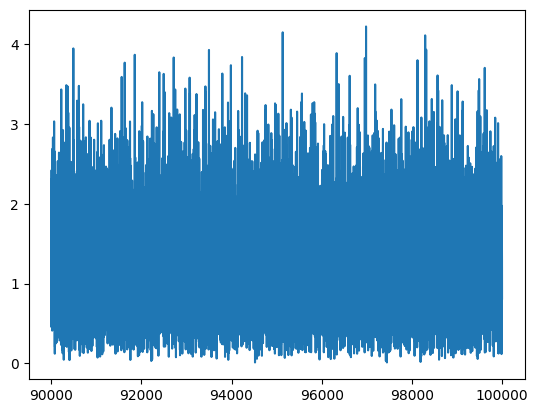

In [18]:
sigma = 20.0

pop = pymri.population(ws, t2s, 1.0, spins_phi)

sig, t = pymri.population_transverse_decay(t0, tn, dt, pop, np.array([]))
sig_fft = fftshift(fft(sig, sig.size))
P_fft = np.nanmax(sig_fft)

sigma = 1.0
center = 0.0
a = 1.0


corrup = pymri.corrupted_snr(sig, center, sigma)
gen_sigmas = P/pymri.snr(np.abs(corrup), plot = True)

sig_fft = fftshift(fft(corrup, corrup.size))
gen_fft_sigmas = P_fft.real/pymri.snr(sig_fft) 